<a href="https://colab.research.google.com/github/nikunjbhalla/diabetes_prediction/blob/main/DiabetesDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries/Dataset

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

## Data Visualization and Exploration



In [4]:
df.shape

(253680, 22)

### Sanity check of data set

In [5]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
pd.set_option('display.max_columns', None)
df.sample(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
194085,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,10.0,15.0,0.0,1.0,10.0,4.0,6.0
17751,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,10.0,0.0,0.0,9.0,5.0,8.0


In [7]:
# adding additional Diabetes column with class name for clarity in analysis
df['Diabetes'] = df['Diabetes_012'].replace({0.0:'no diabetes', 1.0:'prediabetes', 2.0:'diabetes'})

### Class Imbalance Check

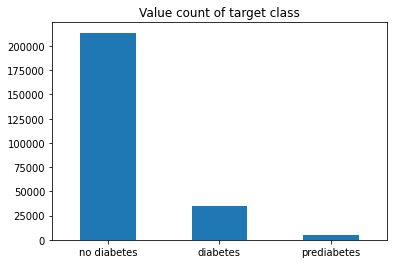

In [8]:
pd.value_counts(df['Diabetes']).plot(kind='bar', title='Value count of target class', rot=0)

In [9]:
df['Diabetes'].value_counts()

no diabetes    213703
diabetes        35346
prediabetes      4631
Name: Diabetes, dtype: int64

We have three target classes for diabetes and the data is distributed among them in imbalanced way.
*   0 = no diabetes
*   1 = prediabetes
*   2 = diabetes

To fix this we can take help of over sampling, under sampling or synthetic data creation using techniques like SMOTE

### Visualize Data

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


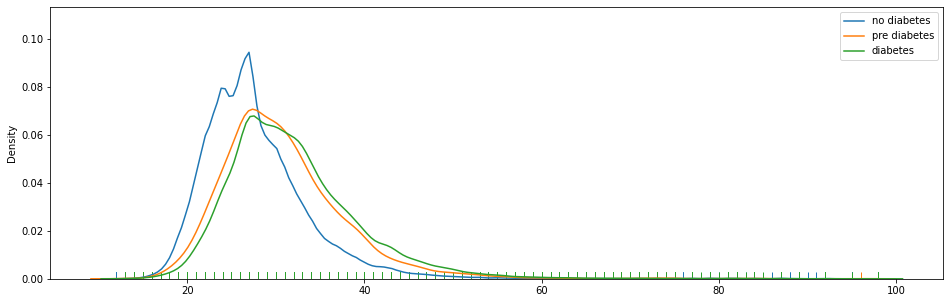

In [11]:
# plotting a dist plot here, to see the distribution of BMI in the dataset for all the target classes
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
target_0 = df.loc[df['Diabetes_012'] == 0]
target_1 = df.loc[df['Diabetes_012'] == 1]
target_2 = df.loc[df['Diabetes_012'] == 2]
sns.distplot(target_0[['BMI']], hist=False, rug=True, label="no diabetes")
sns.distplot(target_1[['BMI']], hist=False, rug=True, label="pre diabetes")
sns.distplot(target_2[['BMI']], hist=False, rug=True, label="diabetes")
plt.legend()
plt.show()

* From the above plot we can find data has a normal distribution of BMI in it. It is not skewed towards people with BMI of certain limits.
* Data set with *no diabetes* peak on lower range of BMI
* *pre diabetic or diabetic* behaviour are more spread towards higher BMI values
* Thus relation between ***high BMI and high chances of diabetes*** can be seen.

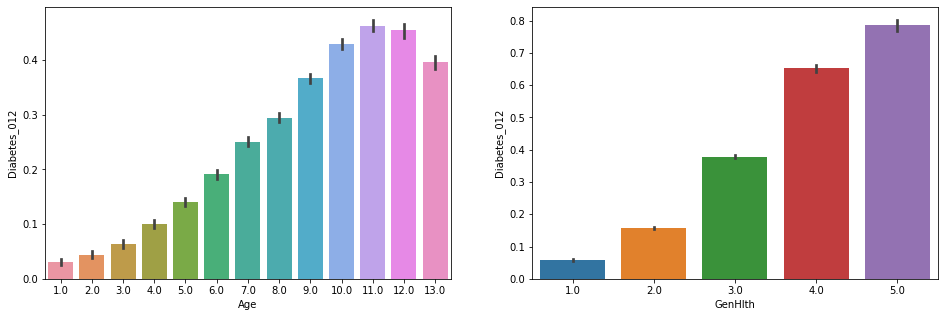

In [11]:
# checking for distribution of data with respect to Age and General health parameters

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x="Age", y="Diabetes_012", data=df)
plt.subplot(1,2,2)
sns.barplot(x="GenHlth", y="Diabetes_012", data=df)
plt.show()

* First plot, Age versus Diabetes, tells us that diabetes is more ***prevelant higher age brackets***.<br>
* Second plot, General Health vs Diabetes, tells a clear relation between ***depleting general health and diabetes***

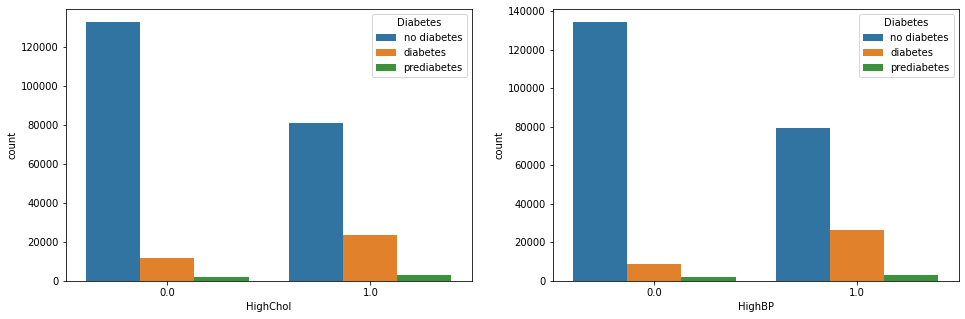

In [29]:
# checking for distribution of data with respect to HighBP and HighChol health parameters

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(x="HighChol", hue="Diabetes", data=df)
plt.subplot(1,2,2)
sns.countplot(x="HighBP", hue="Diabetes", data=df)
plt.show()

* Both the plots conclude higher values of HighBP and HighChol in people with diabetes, thus displaying a strong correlation

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

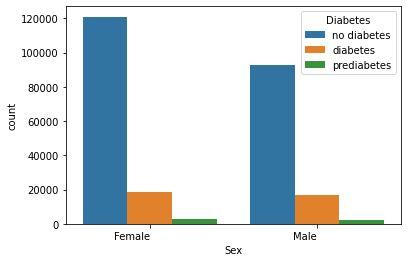

In [25]:
ax = sns.countplot(x="Sex", data=df, hue='Diabetes')
ax.set_xticklabels(['Female', 'Male'], ha="right")

In [26]:
df['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [27]:
df_grouped_sex = pd.crosstab(df["Diabetes"], df["Sex"])
df_grouped_sex

Sex,0.0,1.0
Diabetes,,
diabetes,18411,16935
no diabetes,120959,92744
prediabetes,2604,2027


### Corelation Analysis

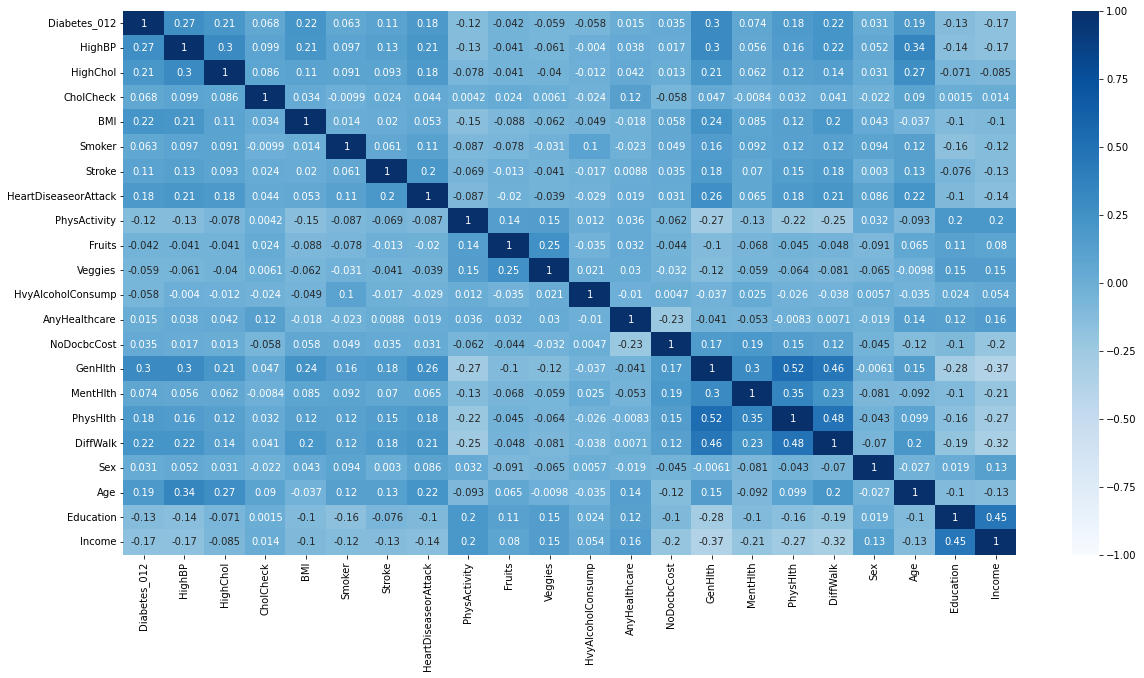

In [30]:
plt.figure(figsize=(20,10))
df_corr = df.corr()
ax = sns.heatmap(df_corr, cmap="Blues",annot=True, vmax=1, vmin=-1)
plt.show()

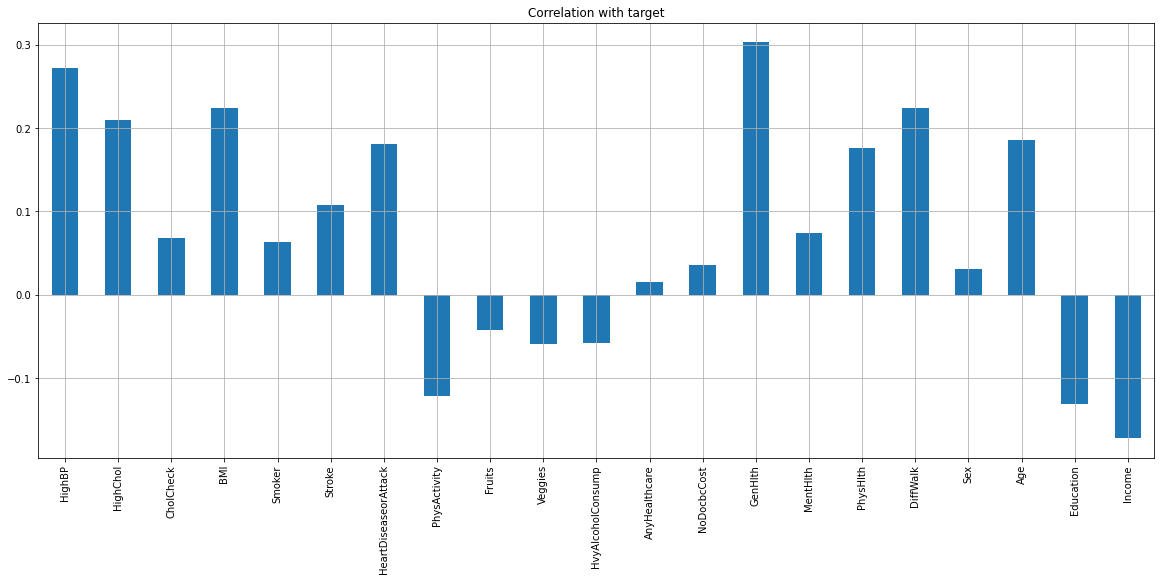

In [31]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target");

**OBSERVATION** <br>
*   No obvious highly correlated features against the target class.
*   AnyHealthCare, NoDocbcCost, Sex, Fruits, Veggies are least correlated features with target variable
*   Maximum correlation of High BP, High Cholestrol, BMI, GenHlth, DiffWalk against Target class is in range of 0.2-0.3, which is not too significant
*   DiffWalk, PhysHlth, MentlHlth are all positively correlated with GenHlth. So using only GenHlth as a feature in place of 4 similar features would reduce bias. Similarly, Income and Education are correlated features



## Data Pre-processing and cleaning

### Handle null/missing values

In [32]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64

**OBSERVATION** <br>

*   No missing or null values in data set.
*   No need for data imputataion or removal



### Remove Duplicate Data

In [33]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  23899


In [34]:
df.drop_duplicates(inplace = True)
df.shape

(229781, 23)

### Outlier Analysis

As all the other columns are categorical in nature, we perform outlier analysis on BMI column by plotting a box plot below

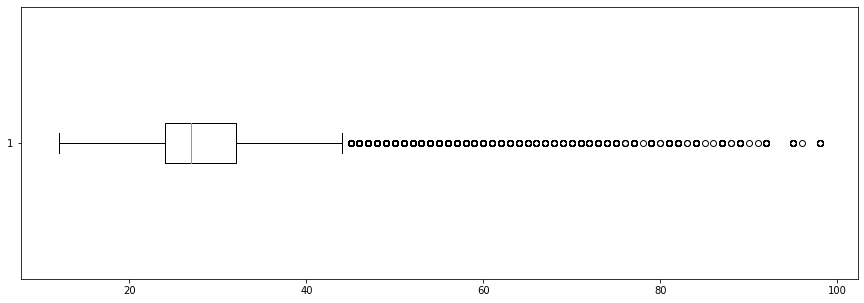

In [35]:
plt.figure(figsize=(15,5))
plt.boxplot(df["BMI"], vert=False)
plt.show()

In [36]:
def outlier_removal(df, features):
  print('Performing outlier removal from each column of dataframe')
  print('Initial Shape of df : {}'.format(df.shape))
  input_df = df.copy()

  for col in features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    input_df.drop( input_df[(input_df[col] < lower_bound) | (input_df[col] > upper_bound)].index, inplace=True)
  print('Final Shape of df : {}'.format(input_df.shape))
  print('\nDecrease in size of dataset : {} %'.format((1-input_df.shape[0]/df.shape[0])*100))
  return input_df

In [37]:
df_outlier_removed = outlier_removal(df, ['BMI'])

Performing outlier removal from each column of dataframe
Initial Shape of df : (229781, 23)
Final Shape of df : (224143, 23)

Decrease in size of dataset : 2.4536406404358946 %


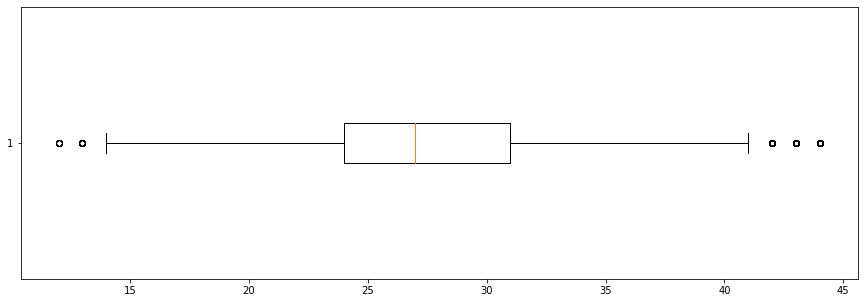

In [38]:
plt.figure(figsize=(15,5))
plt.boxplot(df_outlier_removed["BMI"], vert=False)
plt.show()

### Feature Selection

Training a base decision tree classifier to extract some rules from the dataset

In [51]:
X = df.drop(['Diabetes_012','Diabetes'],axis=1)
y = df['Diabetes_012']

In [74]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
model = clf.fit(X, y)

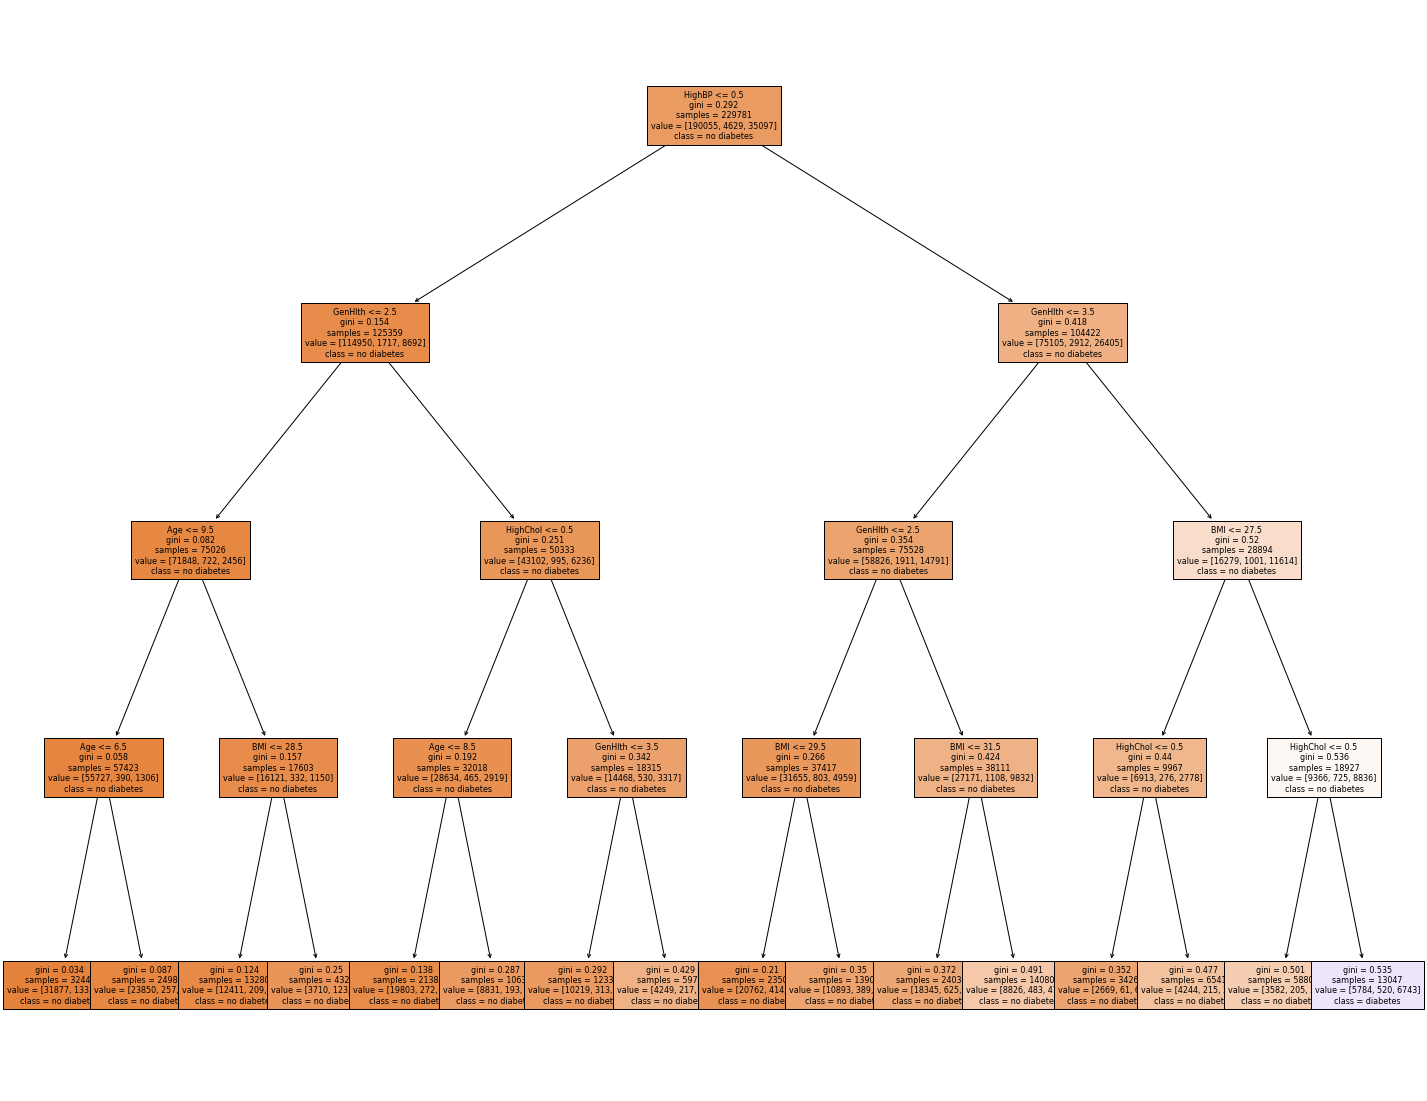

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['no diabetes', 'prediabetes', 'diabetes'], filled=True, fontsize=8)

In [80]:
# training the base model again but with larger depth value, to understand more about other features

clf = DecisionTreeClassifier(random_state=1234, max_depth=12)
model = clf.fit(X, y)

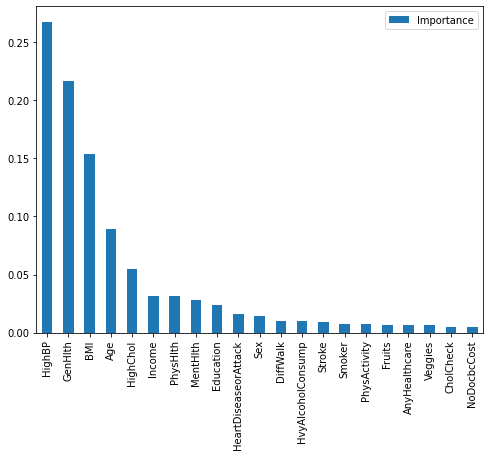

In [81]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

* We can deduce that HighBP, GenHlth, BMI, HighChol and Age are top 5 features ***which again matches our corrleation analysis and EDA performed earlier***.
* From Corrleation analysis earlier, we identified almost no relation between AnyHealthCare, NoDocbcCost, Veggies, Fruits and the target variable.
Thus dropping these features from our dataset.
* DiffWalk, PhysHlth, MentlHlth are similar features to GenHlth which is an important feature. Thus we can drop these features too.
* As we found in corelation analysis earlier, Income and Education are also correlated, thus we choose to drop Education too


In [123]:
df_selected_features = df_outlier_removed.drop([ 'AnyHealthcare','NoDocbcCost',
                                    'Veggies','Fruits','CholCheck', 
                                    'DiffWalk','PhysHlth','MentHlth',
                                    'Education', 'Diabetes'],axis=1)


In [131]:
list(df_selected_features.columns)

['Diabetes_012',
 'HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'Sex',
 'Age',
 'Income']

## Model Building

### Train/test Split

In [124]:
y = df_selected_features['Diabetes_012']
X = df_selected_features.drop(['Diabetes_012'],axis=1)

#### Handle Imbalance Data

In [125]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)

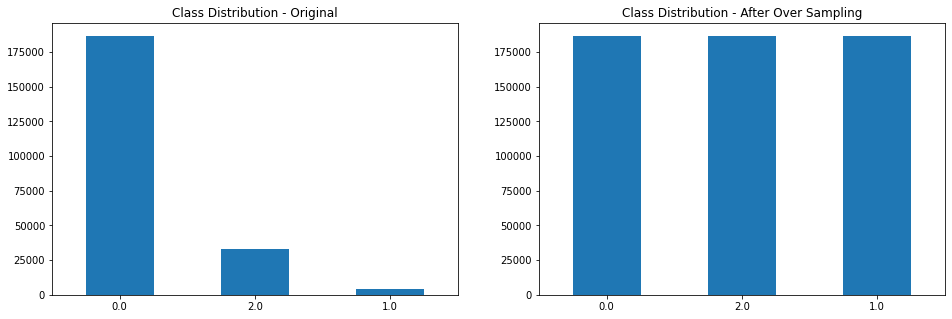

In [126]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
pd.value_counts(y).plot(kind='bar', title='Class Distribution - Original', rot=0)
plt.subplot(1,2,2)
pd.value_counts(y_oversample).plot(kind='bar', title='Class Distribution - After Over Sampling', rot=0)
plt.show()

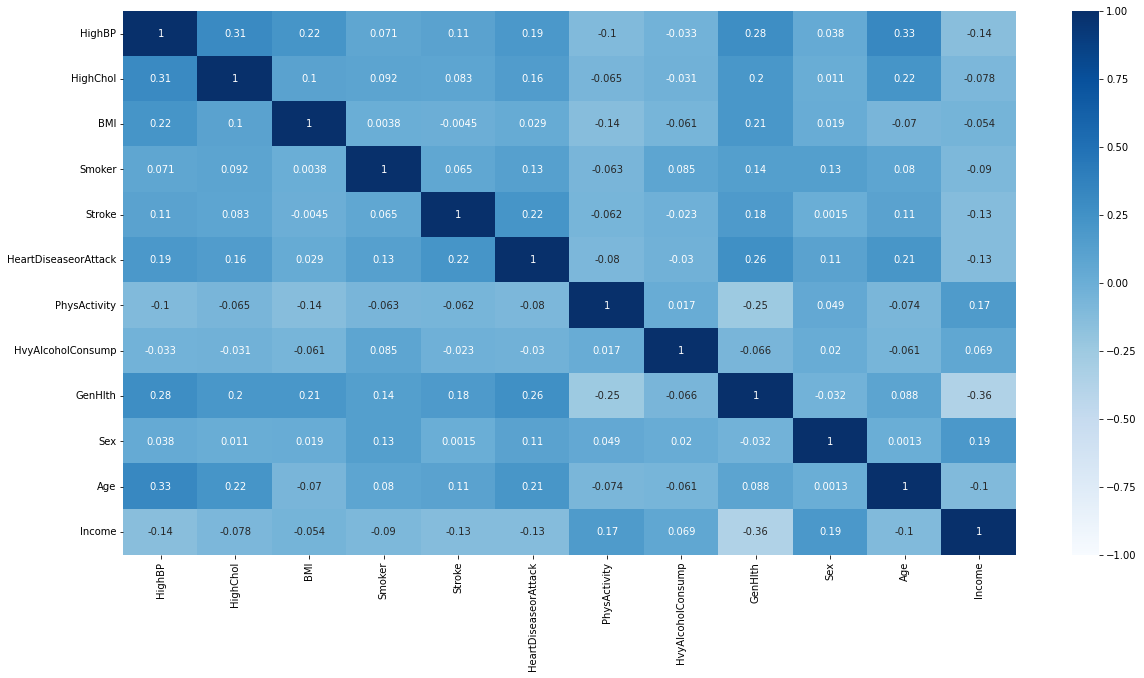

In [127]:
plt.figure(figsize=(20,10))
df_corr = X_oversample.corr()
ax = sns.heatmap(df_corr, cmap="Blues",annot=True, vmax=1, vmin=-1)
plt.show()

#### Split

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,test_size=0.2,random_state=1)

In [129]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(447813, 12)
(447813,)
(111954, 12)
(111954,)


### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [10,50,100]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [6,10,14,18]
# Minimum number of samples required to split a node
min_samples_split = [15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state':[42]}
pprint(random_grid)

{'max_depth': [6, 10, 14, 18],
 'max_features': ['auto'],
 'min_samples_leaf': [50],
 'min_samples_split': [15, 100],
 'n_estimators': [10, 50, 100],
 'random_state': [42]}


In [182]:
rf = RandomForestClassifier()

rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, verbose=2, n_jobs=1, return_train_score=True)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=10, random_state=42; total time=   3.3s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=10, random_state=42; total time=   3.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=10, random_state=42; total time=   3.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=10, random_state=42; total time=   3.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=10, random_state=42; total time=   3.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=50, random_state=42; total time=  15.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=50, min_samples_split=15, n_estimators=50, random_state=42

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [6, 10, 14, 18], 'max_features': ['auto'],
                         'min_samples_leaf': [50],
                         'min_samples_split': [15, 100],
                         'n_estimators': [10, 50, 100], 'random_state': [42]},
             return_train_score=True, verbose=2)

In [205]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score

result_table = []

def evaluate(model, X_train, y_train, X_test, y_test, case, verbose=False):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    precision, recall, fscore, support = score(y_train, y_train_pred)
    result_table.append([f'{case}-Train',(metrics.accuracy_score(y_train, y_train_pred)*100),precision, recall, fscore, support])
    precision, recall, fscore, support = score(y_test, y_pred)
    result_table.append([f'{case}-Test',(metrics.accuracy_score(y_test, y_pred)*100),precision, recall, fscore, support])

    if verbose:
      print("Train Accuracy: {} %".format(metrics.accuracy_score(y_train, y_train_pred)*100))
      print("Test Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred)*100))

      print("Train Confusion Matrix:")
      cf_train_matrix = metrics.confusion_matrix(y_train, y_train_pred)
      report = metrics.classification_report(y_train, y_train_pred)
      print(report)
      
      print("Test Confusion Matrix:")  
      report = metrics.classification_report(y_test, y_pred)
      print(report)

      cf_matrix = metrics.confusion_matrix(y_test, y_pred)    
      
      fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
      
      sns.heatmap(cf_train_matrix, annot=True, cmap='Blues', fmt='g', ax=ax1)
      ax1.set_title('Confusion Matrix - Train Data\n\n')
      ax1.set_xlabel('\nPredicted Values')
      ax1.set_ylabel('Actual Values ')
      
      sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax2)
      ax2.set_title('Confusion Matrix - Test Data\n\n')
      ax2.set_xlabel('\nPredicted Values')
      ax2.set_ylabel('Actual Values ')
      plt.tight_layout()
      plt.show()

In [206]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=18, min_samples_leaf=50, min_samples_split=15,
                       random_state=42)

Train Accuracy: 76.09984524790482 %
Test Accuracy: 75.37738714114725 %
Train Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81    149310
         1.0       0.79      0.82      0.81    149009
         2.0       0.69      0.63      0.66    149494

    accuracy                           0.76    447813
   macro avg       0.76      0.76      0.76    447813
weighted avg       0.76      0.76      0.76    447813

Test Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     37279
         1.0       0.79      0.81      0.80     37580
         2.0       0.68      0.62      0.65     37095

    accuracy                           0.75    111954
   macro avg       0.75      0.75      0.75    111954
weighted avg       0.75      0.75      0.75    111954



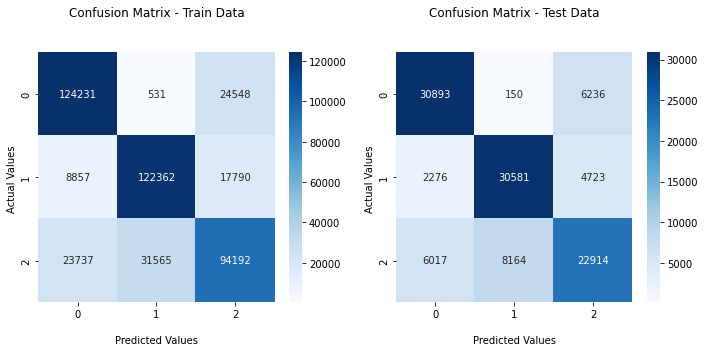

In [207]:
evaluate(best_random, X_train, y_train, X_test, y_test, 'RF-GridCVBest', verbose=True)

100%|██████████| 8/8 [11:46<00:00, 88.37s/it] 


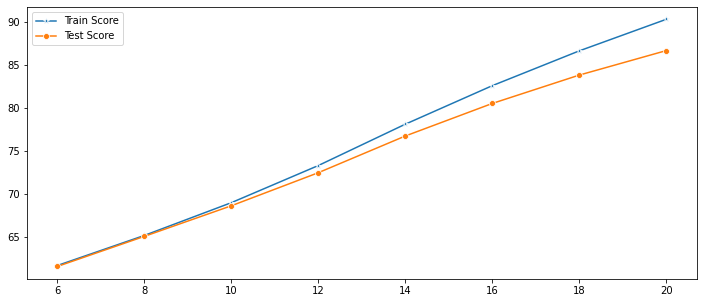

In [208]:
from tqdm import tqdm

accuracy = []
for depth in tqdm(range(6,22,2)):
  base_model = RandomForestClassifier(n_estimators = 100, max_depth = depth,random_state = 42)
  base_model.fit(X_train, y_train)
  y_train_pred = base_model.predict(X_train)
  y_pred = base_model.predict(X_test)

  train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
  test_accuracy = metrics.accuracy_score(y_test, y_pred)*100

  accuracy.append({'train_accuracy': train_accuracy,
                  'test_accuracy' : test_accuracy,
                  'max_depth': depth})

  evaluate(base_model, X_train, y_train, X_test, y_test, 'RF-TreeDepth{}'.format(depth))

train_scores = [ sub['train_accuracy'] for sub in accuracy ]
test_scores = [ sub['test_accuracy'] for sub in accuracy ]

plt.figure(figsize=(12,5))
p = sns.lineplot(range(6,22,2),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(6,22,2),test_scores,marker='o',label='Test Score')

### KNN

## Performance Evaluation

In [209]:
from tabulate import tabulate
print(tabulate(result_table, headers=['Case','Accuracy %', 'Precision', 'Recall', 'F1 Score', 'Support']))

Case                    Accuracy %  Precision                           Recall                              F1 Score                            Support
--------------------  ------------  ----------------------------------  ----------------------------------  ----------------------------------  ----------------------
RF-GridCVBest-Train        76.0998  [0.79216324 0.79220241 0.68989966]  [0.83203402 0.82117188 0.63007211]  [0.81160926 0.80642706 0.65863005]  [149310 149009 149494]
RF-GridCVBest-Test         75.3774  [0.78836829 0.78624502 0.67646798]  [0.82869712 0.81375732 0.61771128]  [0.80802982 0.79976463 0.64575583]  [37279 37580 37095]
RF-TreeDepth6-Train        61.6452  [0.69602359 0.64876982 0.5172272 ]  [0.74922644 0.51955922 0.58041794]  [0.72164576 0.57701954 0.54700364]  [149310 149009 149494]
RF-TreeDepth6-Test         61.5351  [0.69389788 0.65355364 0.51344801]  [0.74733764 0.51679085 0.5825583 ]  [0.71962701 0.57718141 0.54582423]  [37279 37580 37095]
RF-TreeDepth8-Train